<a href="https://colab.research.google.com/github/iqrasarwar/ComputerVision/blob/main/Canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = plt.imread("/content/drive/MyDrive/ComputerVisionCoLabFiles/face.jpg")
#making an array for convoluted result
grayScaleImg = np.zeros(shape = (img.shape[0],img.shape[1]))
smoothed = np.zeros(shape = (img.shape[0],img.shape[1]))
fx = np.zeros(shape = (img.shape[0],img.shape[1]))
fy = np.zeros(shape = (img.shape[0],img.shape[1]))
mag = np.zeros(shape = (img.shape[0],img.shape[1]))
cross_nebours = np.zeros(shape = (img.shape[0],img.shape[1],2))
original_A = img
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def grayScale(cat):
  rows = cat.shape[0]
  columns = cat.shape[1]
  grayImg = np.zeros((rows,columns))
  for i in range(rows):
    for j in range(columns):
      red = cat[i,j,0]
      green = cat[i,j,1]
      blue = cat[i,j,2]
      gray = (((0.21*red)+(0.07*blue)+(0.72*green))/3)
      grayImg[i][j] = gray
  return grayImg

In [4]:
def convolution(mask,img):
    # "convoluted" stores the final result of convolution performed on "img"
    convoluted = np.zeros(shape = (img.shape[0],img.shape[1]))
    r = img.shape[0]
    c = img.shape[1]
    for i in range(r):
        for j in range(c):
            # current stores the currently active portion of img that is to be multiplied with mask
            current = np.zeros(shape = (mask.shape[0],mask.shape[1]))
            r1 = mask.shape[0]
            c1 = mask.shape[1]
            # finding the center location of the mask
            a = math.floor(r1/2)
            b = math.floor(c1/2)
            x = 0
            #these two loops iterates the area of image below the kernel that should be multilied with mask
            for k in range(i-a,i+a+1):
                y=0
                for l in range(j-b,j+b+1):
                    #if valid location of image exist at the given indexes copy it to to current(that will be multiplid with mask/kernel)
                    #else it contains zero by default
                    if(k >= 0 and l >= 0 and k < r and l < c):
                        current[x][y] = img[k][l] 
                    y= y+1
                x=x+1
            sum = 0
            #multiply the respective vales and add them
            for m in range (x):
                n=0
                for n in range(y):
                    sum += current[m][n]*mask[m][n]
            # store the convoluted result for partivular pixel i j in convoluted array
            convoluted[i][j] = sum
    return convoluted

In [5]:
#filp fist and last row and column
def flip(kernel):
    kernel[:,[0, -1]] = kernel[:,[-1, 0]] #horizonta flip
    kernel[[0, -1]] = kernel[[-1, 0]]     #vertical flip
    return kernel

In [6]:
#for the given channels of image and a kernel perform convolution on all channels and return the reslut
def performConvolution(gray,kernel,result):
    #flip the kernel before convolution
    kernel = flip(kernel)
    result = convolution(kernel,gray)
    #clip the result to normalize the image if out of range pixel values exists
    # result = np.clip(result, 0, 255)
    return result

([], <a list of 0 Text major ticklabel objects>)

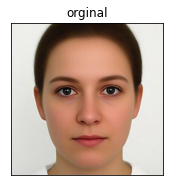

In [7]:
plt.subplot(121)
plt.imshow(original_A)
plt.title("orginal")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

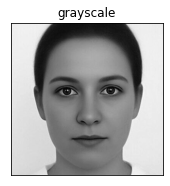

In [8]:
grayScaleImg = grayScale(img)
plt.subplot(121)
plt.imshow(grayScaleImg,cmap="gray")
plt.title("grayscale")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

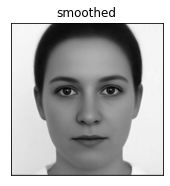

In [9]:
kernel = 1/9*(np.array([[1,1,1],
                         [1,1,1],
                         [1,1,1]]))
smoothed = performConvolution(grayScaleImg,kernel,smoothed)
plt.subplot(121)
plt.imshow(smoothed,cmap="gray")
plt.title("smoothed")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

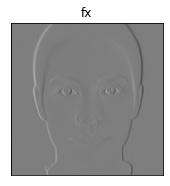

In [22]:
kernel = (np.array([[-1,0,1],
                         [-2,0,2],
                         [-1,0,1]]))
fx = performConvolution(smoothed,kernel,fx)
plt.subplot(121)
plt.imshow(fx,cmap="gray")
plt.title("fx")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

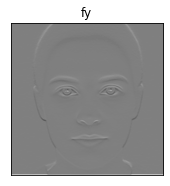

In [23]:
kernel = (np.array([[-1,-2,-1],
                         [0,0,0],
                         [1,2,1]]))
fy = performConvolution(smoothed,kernel,fy)
plt.subplot(121)
plt.imshow(fy,cmap="gray")
plt.title("fy")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

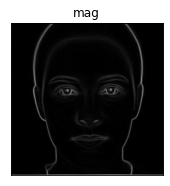

In [24]:
x,y=fx.shape
for i in range(x):
  for j in range(y):
    mag[i][j] = math.sqrt(fx[i][j]*fx[i][j]+fy[i][j]*fy[i][j])
# mag = np.clip(mag, 0, 255)
plt.subplot(121)
plt.imshow(mag.astype('uint8'),cmap="gray")
plt.title("mag")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

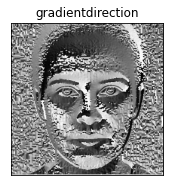

In [25]:
gradientdirection = np.arctan2(fy,fx)
gradientdirection = np.rad2deg(gradientdirection)
gradientdirection += 180
plt.subplot(121)
plt.imshow(gradientdirection,cmap="gray")
plt.title("gradientdirection")
plt.xticks([])
plt.yticks([])

In [26]:
x,y=gradientdirection.shape
for i in range(x):
  for j in range(y):
    if((gradientdirection[i][j] >= 67.5 and gradientdirection[i][j] <= 112.5) or (gradientdirection[i][j] >=247.5 and gradientdirection[i][j] <= 292.5)):
      if(i-1 > 0):
       cross_nebours[i][j][0] = mag[i-1][j]
      if(i+1 < x):
        cross_nebours[i][j][1] = mag[i+1][j]
    if((gradientdirection[i][j] >= 112.5 and gradientdirection[i][j] <= 157.5) or (gradientdirection[i][j] >= 292.5 and gradientdirection[i][j] <= 337.5)):
        if(i-1 > 0 and j-1 >0):
          cross_nebours[i][j][0] = mag[i-1][j-1]
        if(i+1 < x and j+1 < y):
          cross_nebours[i][j][1] = mag[i+1][j+1]
    if((gradientdirection[i][j] >= 22.5 and gradientdirection[i][j] <= 67.5) or (gradientdirection[i][j] >= 202.5 and gradientdirection[i][j] <= 247.5)):
      if(i-1 > 0 and j+1 > y):
        cross_nebours[i][j][0] = mag[i-1][j+1]
      if(i+1 < x and j-1 >0):
        cross_nebours[i][j][1] = mag[i+1][j-1]
    if((gradientdirection[i][j] >= 337.5 and gradientdirection[i][j] <=  22.5) or (gradientdirection[i][j] >= 157.5 and gradientdirection[i][j] <= 202.5)):
      if(j-1 >0):
        cross_nebours[i][j][0] = mag[i][j-1]
      if(j+1 > y):
        cross_nebours[i][j][1] = mag[i][j+1]

([], <a list of 0 Text major ticklabel objects>)

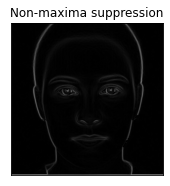

In [27]:
for i in range(x):
  for j in range(y):
    if(gradientdirection[i][j] < cross_nebours[i][j][0] or gradientdirection[i][j] < cross_nebours[i][j][1]):
      mag[i][j] = 0
plt.subplot(121)
plt.imshow(mag,cmap="gray")
plt.title("Non-maxima suppression")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

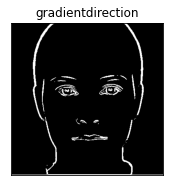

In [28]:
tnew = 35
told = 70
x,y=mag.shape
magc = mag.copy()
for i in range(x):
  for j in range(y):
    if(mag[i][j] < told):
      magc[i][j] = 0
    if(mag[i][j] > tnew):
      magc[i][j] = 255
    else:
      magc[i][j] = 100
plt.subplot(121)
plt.imshow(magc,cmap="gray")
plt.title("gradientdirection")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

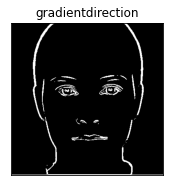

In [29]:
for i in range(x):
  for j in range(y):
    if(magc[i][j] == 50):
      if(i-1 > 0 and j+1 > y and i+1 < x and j-1 >0):
        if(magc[i-1][j] == 255 or magc[i+1][j] == 255 or magc[i][j-1] == 255 or magc[i][j+1] == 255 or magc[i-1][j-1] == 255 or magc[i+1][j+1] == 255 or magc[i-1][j+1] == 255 or magc[i+1][j-1] == 255):
          magc[i][j] == 255
plt.subplot(121)
plt.imshow(magc,cmap="gray")
plt.title("gradientdirection")
plt.xticks([])
plt.yticks([])